# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


In [5]:
#cities=['Chicago','Detroit']
cities

['bilibino',
 'tiksi',
 'ciudad bolivar',
 "'ohonua",
 'jamestown',
 'nadym',
 'avarua',
 'praia',
 'college',
 'port elizabeth',
 'poteau',
 'andrews',
 'al kharijah',
 'bantilan',
 'aljezur',
 'puerto natales',
 'vuktyl',
 'bejaia',
 'arraial do cabo',
 'hasaki',
 'waitangi',
 'grytviken',
 'wailua homesteads',
 'ivolginsk',
 'adamstown',
 'makarov',
 'udachny',
 'hithadhoo',
 'kapuskasing',
 'barcelos',
 'saint-francois',
 'ouesso',
 'port-aux-francais',
 'portland',
 'rio grande',
 'longyearbyen',
 "kapa'a",
 'iqaluit',
 'taiohae',
 'mao',
 'yellowknife',
 'nova sintra',
 'bubaque',
 'kirandul',
 'olonkinbyen',
 'kodiak',
 'crucecita',
 'hadibu',
 'albany',
 'ingeniero jacobacci',
 'dudinka',
 'ilulissat',
 'puerto baquerizo moreno',
 'kimbe',
 'ribeira grande',
 'san andres',
 'anadyr',
 'grand falls-windsor',
 'blackmans bay',
 'margaret river',
 "nar'yan-mar",
 'bayganin',
 'west island',
 'laguna salada',
 'selfoss',
 'punta arenas',
 'impfondo',
 'tura',
 'broome',
 'salalah',

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | ciudad bolivar
Processing Record 4 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | nadym
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | praia
Processing Record 9 of Set 1 | college
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | poteau
Processing Record 12 of Set 1 | andrews
Processing Record 13 of Set 1 | al kharijah
Processing Record 14 of Set 1 | bantilan
Processing Record 15 of Set 1 | aljezur
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | vuktyl
Processing Record 18 of Set 1 | bejaia
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | hasaki
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of Set 1 | grytviken
Processing R

Processing Record 40 of Set 4 | nizhneudinsk
Processing Record 41 of Set 4 | emerald
Processing Record 42 of Set 4 | mil'kovo
Processing Record 43 of Set 4 | tabou
Processing Record 44 of Set 4 | christchurch
Processing Record 45 of Set 4 | sumperk
Processing Record 46 of Set 4 | port alfred
Processing Record 47 of Set 4 | thinadhoo
Processing Record 48 of Set 4 | northam
Processing Record 49 of Set 4 | lihue
Processing Record 0 of Set 5 | holualoa
Processing Record 1 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 2 of Set 5 | xining
Processing Record 3 of Set 5 | brookings
Processing Record 4 of Set 5 | morant bay
Processing Record 5 of Set 5 | quelimane
Processing Record 6 of Set 5 | sur
Processing Record 7 of Set 5 | suncho corral
Processing Record 8 of Set 5 | uacu cungo
Processing Record 9 of Set 5 | williams lake
Processing Record 10 of Set 5 | bandarbeyla
Processing Record 11 of Set 5 | likasi
Processing Record 12 of Set 5 | sangin
Processing Record 1

Processing Record 33 of Set 8 | amherst
Processing Record 34 of Set 8 | lorengau
Processing Record 35 of Set 8 | sirte
Processing Record 36 of Set 8 | aguazul
Processing Record 37 of Set 8 | muroto-misakicho
Processing Record 38 of Set 8 | international falls
Processing Record 39 of Set 8 | serov
Processing Record 40 of Set 8 | altinekin
Processing Record 41 of Set 8 | labytnangi
Processing Record 42 of Set 8 | jianguang
Processing Record 43 of Set 8 | muang khong
Processing Record 44 of Set 8 | manokwari
Processing Record 45 of Set 8 | lucas
Processing Record 46 of Set 8 | tocopilla
Processing Record 47 of Set 8 | pasighat
Processing Record 48 of Set 8 | ulsteinvik
Processing Record 49 of Set 8 | ivisan
Processing Record 0 of Set 9 | fort mcmurray
Processing Record 1 of Set 9 | caska
Processing Record 2 of Set 9 | mili
Processing Record 3 of Set 9 | dunedin
Processing Record 4 of Set 9 | okha
Processing Record 5 of Set 9 | sitka
Processing Record 6 of Set 9 | hammerfest
Processing Rec

Processing Record 21 of Set 12 | boundiali
Processing Record 22 of Set 12 | crestview
Processing Record 23 of Set 12 | ad dabbah
Processing Record 24 of Set 12 | pariaman
Processing Record 25 of Set 12 | hotan
Processing Record 26 of Set 12 | sacele
Processing Record 27 of Set 12 | westport
Processing Record 28 of Set 12 | dalandzadgad
Processing Record 29 of Set 12 | kassala
Processing Record 30 of Set 12 | fort-shevchenko
Processing Record 31 of Set 12 | ubari
Processing Record 32 of Set 12 | kurtamysh
Processing Record 33 of Set 12 | trenggalek
Processing Record 34 of Set 12 | essaouira
Processing Record 35 of Set 12 | jabor
Processing Record 36 of Set 12 | ouarzazat
Processing Record 37 of Set 12 | puerto san jose
Processing Record 38 of Set 12 | kasane
Processing Record 39 of Set 12 | khanty-mansiysk
Processing Record 40 of Set 12 | andalgala
Processing Record 41 of Set 12 | harper
-----------------------------
Data Retrieval Complete      
-----------------------------


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,-26.14,98,43,1.95,RU,1702249865
1,tiksi,71.6872,128.8694,-24.83,100,100,2.18,RU,1702249865
2,ciudad bolivar,8.1222,-63.5497,29.25,59,94,4.45,VE,1702249866
3,jamestown,42.0970,-79.2353,4.77,79,100,3.09,US,1702249720
4,nadym,65.5333,72.5167,-31.33,95,75,3.75,RU,1702249867


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("C:\\Users\\alain\\Bootcamp\\python-api-challenge\\Starter_Code\\output_data\\cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("C:\\Users\\alain\\Bootcamp\\python-api-challenge\\Starter_Code\\output_data\\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

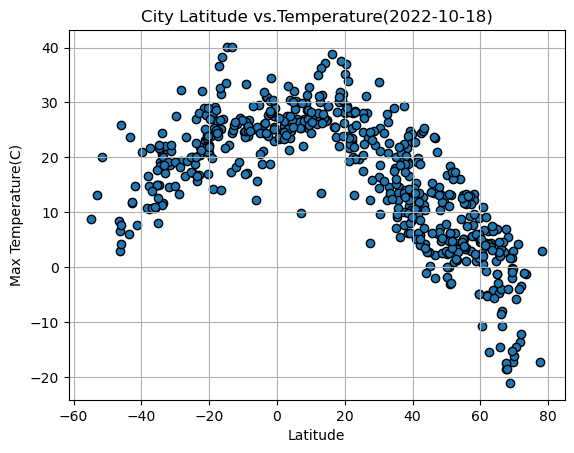

In [22]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('City Latitude vs.Temperature(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("C:\\Users\\alain\\Bootcamp\\python-api-challenge\\Starter_Code\\output_data\\Fig1_lat.vs.temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

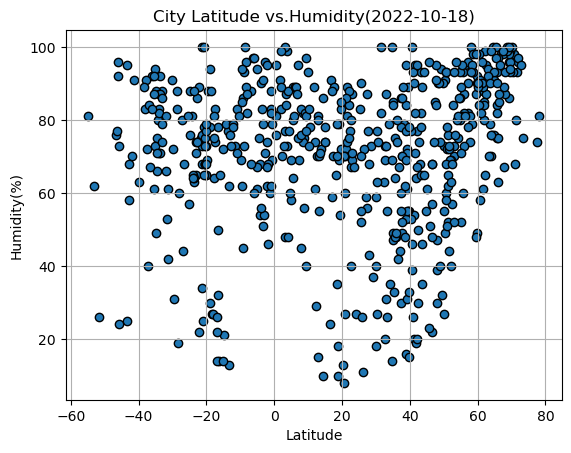

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs.Humidity(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("C:\\Users\\alain\\Bootcamp\\python-api-challenge\\Starter_Code\\output_data\\Fig2_lat.vs.hum.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

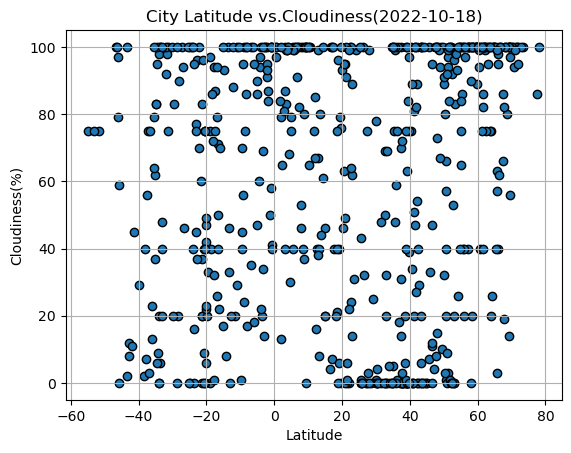

In [24]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs.Cloudiness(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("C:\\Users\\alain\\Bootcamp\\python-api-challenge\\Starter_Code\\output_data\\Fig3_lat.vs.cloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

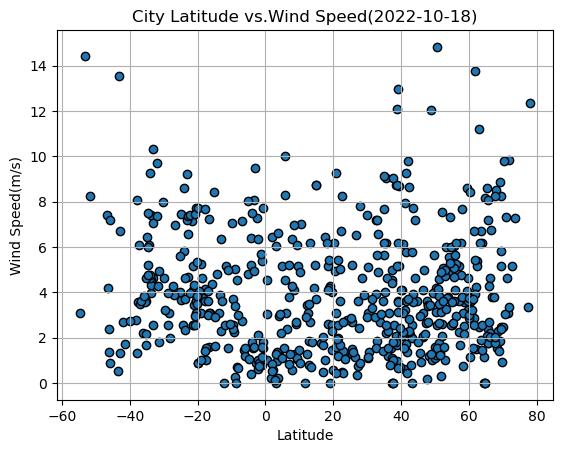

In [25]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title('City Latitude vs.Wind Speed(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("C:\\Users\\alain\\Bootcamp\\python-api-challenge\\Starter_Code\\output_data\\Fig4_lat.vs.wind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
def linear_reg(x_axis, y_axis,eq_loc):  
    correlation = st.pearsonr(x_axis,y_axis)
    p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
    p_fit = p_slope * x_axis + p_int
    eq= f"y ={p_slope: .2f}x +{ p_int: .2f}"
       
    #Plot the line
    plt.scatter(x_axis, y_axis ,marker="o")
    plt.plot(x_axis,p_fit,"--", color='red')
    plt.annotate(eq, eq_loc, fontsize=12, color='red')
    print(f"The r-value between {x_axis.name} and {y_axis.name} is {round(correlation[0],2)}")

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value between Lat and Max Temp is -0.85


Text(0, 0.5, 'Temperature(C)')

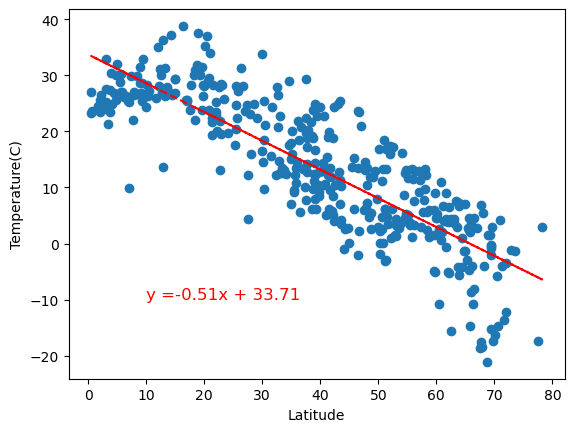

In [31]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],(10, -10))
plt.xlabel('Latitude')
plt.ylabel('Temperature(C)')

The r-value between Lat and Max Temp is 0.64


Text(0, 0.5, 'Temperature(C)')

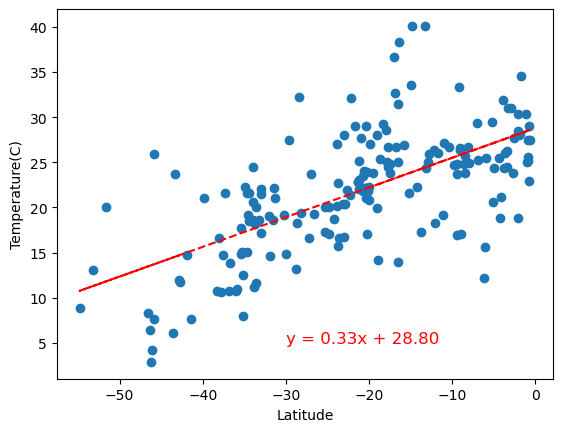

In [32]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],(-30, 5))
plt.xlabel('Latitude')
plt.ylabel('Temperature(C)')

##Discussion about the linear relationship-- In northern hemisphere, a city's latitude and temperature have a negative coorelation.

### Humidity vs. Latitude Linear Regression Plot

The r-value between Lat and Humidity is 0.24


Text(0, 0.5, 'Humidity(%)')

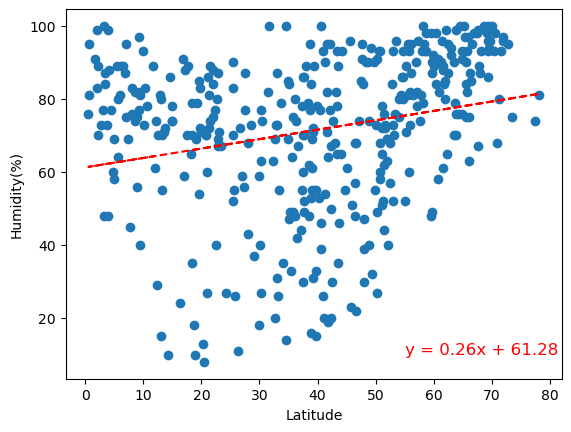

In [33]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],(55, 10))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

The r-value between Lat and Humidity is 0.02


Text(0, 0.5, 'Humidity(%)')

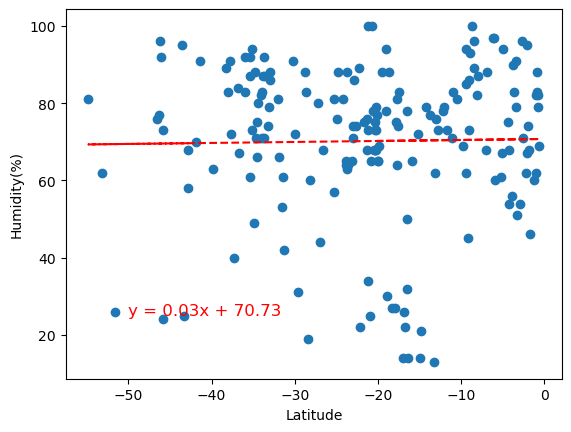

In [34]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],(-50, 25))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

##Discussion about the linear relationship-- In northern hemisphere, a city's latitude and humidity have a weak positive coorelation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value between Lat and Cloudiness is 0.16


Text(0, 0.5, 'Cloudiness(%)')

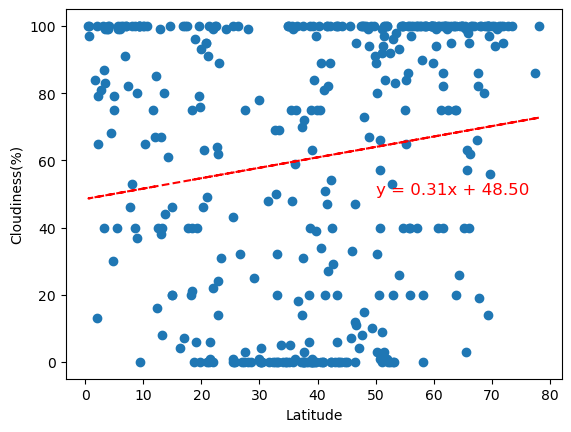

In [35]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],(50, 50))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

The r-value between Lat and Cloudiness is 0.14


Text(0, 0.5, 'Cloudiness(%)')

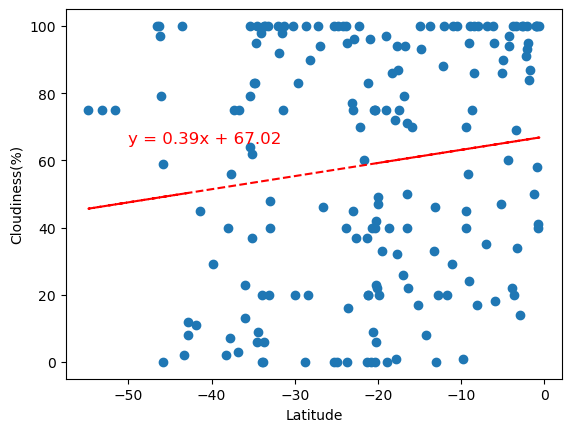

In [36]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],(-50, 65))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

##Discussion about the linear relationship-- In northern hemisphere, a city's latitude and cloudiness level have little to no coorelation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value between Lat and Wind Speed is 0.17


Text(0, 0.5, 'Wind Speed(m/s)')

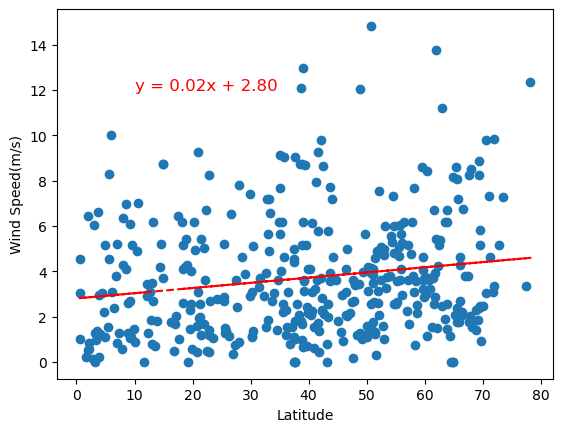

In [37]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],(10, 12))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

The r-value between Lat and Wind Speed is -0.25


Text(0, 0.5, 'Wind Speed(m/s)')

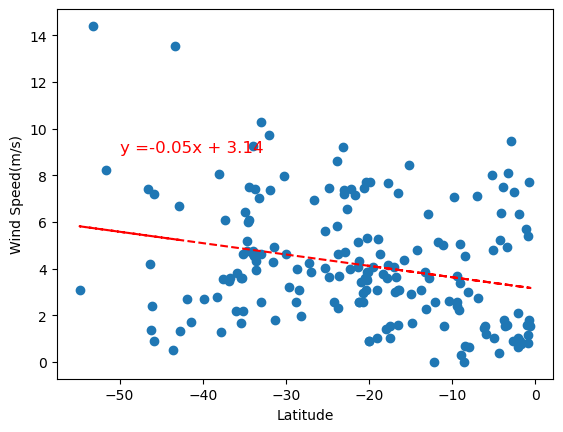

In [38]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],(-50, 9))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

##Discussion about the linear relationship-- In northern hemisphere, a city's latitude and wind speed have no coorelation.